In [1]:
import pandas as pd
import seaborn as sns
wd = "/Users/timvigers/Dropbox/Work/Petter Bjornstad/Pima/Master data/Raw data/"
# wd = "path/to/Laura's/folder"

# Vital Status

In [2]:
# Import
vital_status = pd.read_csv(wd+'NelsonVitalStatusDEC_DATA_2021-02-04_1616.csv')
# Delete empty rows
vital_status = vital_status[vital_status['end_stage_renal_disease_form_complete']!=0]
# Collapse rows - get first non-NA element in each column by record ID
vital_status = vital_status.groupby('record_id',as_index=False).first()
# Get columns of interest - ask Rob and Helen for a list of these
vital_status = vital_status[['esrd_start_date','dod']]

## Data Description

In [3]:
vital_status.describe()

,esrd_start_date,dod
count,93,185
unique,92,184
top,1999-06-04,1999-09-18
freq,2,2


# GFR

In [123]:
def get_gfr(df):
    # Convert record id to categorical 
    df['record_id'] = df['record_id'].astype("category")
    # Index by id and redcap event
    df = df.set_index(['record_id','redcap_event_name'])
    # Find GFR and date columns
    gfr_cols = [col for col in df.columns if col in ['gfr','s_gfr']]
    date_cols = [col for col in df.columns if 'visitdate' in col and "_" not in col]
    # Get all dates
    for d in range(len(date_cols)-1):
        df[date_cols[0]] = df[date_cols[0]].fillna(df[date_cols[d]])
    gfr = df[[date_cols[0]]+gfr_cols]
    # Get all 
    # Drop completely missing rows and columns
    df = gfr.dropna(axis=0,subset=gfr_cols,how='all').dropna(axis=1,how='all')
    # Reindex by name and date
    df.reset_index(level=1,drop=True,inplace=True)
    df.rename(columns={df.columns[0]:'date'},inplace=True)
    df.set_index('date',append=True,inplace=True)
    # Done
    return(df)
def gfr_lineplot(df):
    # Sort by id then date
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    sns.lineplot(x="visit_num", y="gfr",hue="record_id",data=df).get_legend().remove()
def gfr_boxplot(df):
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    sns.boxplot(x='record_id',y="gfr",data=df)

## Group 4

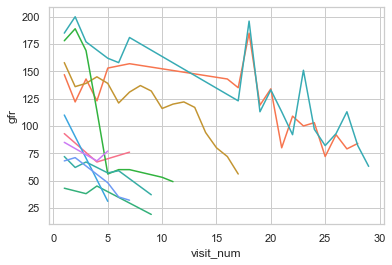

In [125]:
group4 = pd.read_csv(wd+'Group4UofMRemodel112_DATA_2021-02-04_1617.csv',low_memory=False).dropna(axis=1,how='all')
g = get_gfr(group4)
gfr_lineplot(g)

## Ficoll

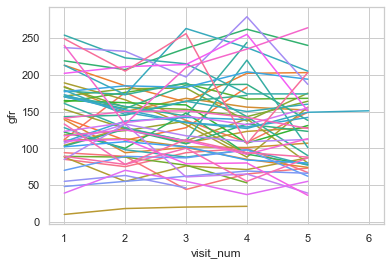

In [67]:
ficoll = pd.read_csv(wd+'FicollUniversityOfMi_DATA_2021-02-04_1618.csv',low_memory=False).dropna(axis=1,how='all')
get_gfr(ficoll)
plot_gfr(ficoll)

## DDN

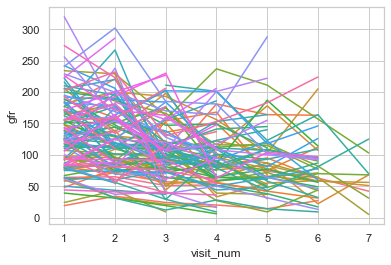

In [68]:
ddn = pd.read_csv(wd+'Nelson13DKN151Determ_DATA_2021-02-04_1610.csv',low_memory=False).dropna(axis=1,how='all')
get_gfr(ddn)
plot_gfr(ddn)

In [69]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para